In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive


In [ ]:
product_data_url= '/content/drive/MyDrive/Final-Project/amazon_products.xlsx'
category_data_url= '/content/drive/MyDrive/Final-Project/amazon_categories.csv'

In [ ]:
# reading the product data
product_df= pd.read_excel(product_data_url)
product_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [ ]:
# reading the category data
category_df= pd.read_csv(category_data_url)
category_df.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


Understanding the dimensions and statistics of our data

In [ ]:
product_df.describe(include="all")

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
count,1048575,1048564,1048575,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06
unique,1048575,1023110,1011144,1048575,NaN,NaN,NaN,NaN,NaN,2,NaN
top,B014TMV5YE,Men's Ultraboost 23 Running Shoe,https://m.media-amazon.com/images/I/01RmK+J4pJ...,https://www.amazon.com/dp/B014TMV5YE,NaN,NaN,NaN,NaN,NaN,False,NaN
freq,1,83,1110,1,NaN,NaN,NaN,NaN,NaN,1042184,NaN
mean,NaN,NaN,NaN,NaN,3.993607e+00,1.774382e+02,4.476936e+01,1.264740e+01,1.278428e+02,NaN,1.532243e+02
std,NaN,NaN,NaN,NaN,1.350485e+00,1.624363e+03,1.405284e+02,4.768020e+01,7.309647e+01,NaN,8.369535e+02
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,7.100000e+01,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,4.400000e+00,0.000000e+00,1.999000e+01,0.000000e+00,1.230000e+02,NaN,0.000000e+00
75%,NaN,NaN,NaN,NaN,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.770000e+02,NaN,1.000000e+02


 Men's Ultraboost 23 Running Shoe is the most selling product in the dataframe.

In [ ]:
product_df.shape

(1048575, 11)

In [ ]:
# checking for nulls in the product dataframe
product_df.isna().sum()

asin                  0
title                11
imgUrl                0
productURL            0
stars                 0
reviews               0
price                 0
listPrice             0
category_id           0
isBestSeller          0
boughtInLastMonth     0
dtype: int64

In [ ]:
# looking at rows that have title as NaN
product_df[product_df.title.isna()]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
305510,B087FBCKRJ,NaN,https://m.media-amazon.com/images/I/5163w9V343...,https://www.amazon.com/dp/B087FBCKRJ,4.0,1,4.87,0.00,35,False,0
335972,B0B8QB9SVV,NaN,https://m.media-amazon.com/images/I/81fiLICP5u...,https://www.amazon.com/dp/B0B8QB9SVV,4.1,0,9.99,0.00,167,False,200
393112,B004PUIGI4,NaN,https://m.media-amazon.com/images/I/41nRPyrIzK...,https://www.amazon.com/dp/B004PUIGI4,4.7,0,24.31,39.45,163,False,0
525041,B0BD66D1KY,NaN,https://m.media-amazon.com/images/I/61HOv-7jLy...,https://www.amazon.com/dp/B0BD66D1KY,5.0,0,14.99,0.00,234,False,0
525154,B0BN552N62,NaN,https://m.media-amazon.com/images/I/71KgfvKX-W...,https://www.amazon.com/dp/B0BN552N62,0.0,0,69.99,0.00,234,False,0
525393,B0B8THC5PM,NaN,https://m.media-amazon.com/images/I/71gViSiapO...,https://www.amazon.com/dp/B0B8THC5PM,0.0,0,23.99,0.00,234,False,0
525414,B0BL23BKGW,NaN,https://m.media-amazon.com/images/I/61qVwEfssq...,https://www.amazon.com/dp/B0BL23BKGW,0.0,0,59.99,0.00,234,False,0
734994,B00HNGMA16,NaN,https://m.media-amazon.com/images/I/61AN0xDy6E...,https://www.amazon.com/dp/B00HNGMA16,4.2,0,0.00,0.00,243,False,0
740769,B08PB76BY1,NaN,https://m.media-amazon.com/images/I/7161GdjHiN...,https://www.amazon.com/dp/B08PB76BY1,0.0,0,0.00,0.00,262,False,0
806907,B07T44F4MM,NaN,https://m.media-amazon.com/images/I/61ldefYkm7...,https://www.amazon.com/dp/B07T44F4MM,4.7,0,10.95,0.00,173,False,0


In [ ]:
# we will simply drop these rows since they're merely a small percentage of the total. Also the fact that all these products
# have been barely bought in the past month, aren't best sellers and hardly have reviews. This renders their use impractical

In [ ]:
# dropping rows having NaN in title column
product_df.dropna(subset='title', inplace= True)
product_df.shape

(1048564, 11)

In [ ]:
# verifying if we have removed all NaN
product_df.isna().sum()

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [ ]:
# checking for nulls in the category_df
category_df.isna().sum()

id               0
category_name    0
dtype: int64

Now we are ready to merge the category column to our original dataframe

In [ ]:
merged_df= pd.merge(product_df, category_df, left_on='category_id', right_on='id', how='inner')
merged_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,104,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,104,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,104,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,104,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,104,Suitcases


In [ ]:
# dropping the id column
merged_df.drop('id', axis=1, inplace=True)
merged_df.head(2)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,Suitcases


We now look for any junk rows. This is achieved by grouping by the
products that are best sellers but have low reviews and star ratings

In [ ]:
best_sellers_df= merged_df[merged_df.isBestSeller==True]

In [ ]:

# identifying junk values and noise in the data
junk_rows_df= best_sellers_df[(best_sellers_df.reviews == min(best_sellers_df.reviews)) & (best_sellers_df.stars==min(best_sellers_df.stars))]
junk_rows_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
9503,B0CFFLPLC6,Men Classic Fit Dress Pant Casual Flat Front P...,https://m.media-amazon.com/images/I/71g3ZNyCqR...,https://www.amazon.com/dp/B0CFFLPLC6,0.0,0,27.99,0.00,110,True,0,Men's Clothing
27473,B0B6FNJY8Z,"Men's Sneaker, Smoke Grey White Dk Smoke Grey, 12",https://m.media-amazon.com/images/I/71huVvjdUY...,https://www.amazon.com/dp/B0B6FNJY8Z,0.0,0,119.05,0.00,114,True,0,Men's Shoes
118357,B0BNK3FHVC,"Girls' Windbreaker, Zip-up Jacket, Water Repel...",https://m.media-amazon.com/images/I/71auySumIH...,https://www.amazon.com/dp/B0BNK3FHVC,0.0,0,34.14,55.00,91,True,0,Girls' Clothing
143065,B0BM4BDMZY,"BELLA BAYS Copper Tubing 1/2"" OD x 7/16"" ID x ...",https://m.media-amazon.com/images/I/71ALKtxgTh...,https://www.amazon.com/dp/B0BM4BDMZY,0.0,0,102.99,111.69,140,True,0,Industrial Materials
146310,B0BZPMVTJ8,"BELLA BAYS Copper Tubing 1/8"" OD x 0.07"" ID x ...",https://m.media-amazon.com/images/I/71ALKtxgTh...,https://www.amazon.com/dp/B0BZPMVTJ8,0.0,0,24.99,0.00,140,True,0,Industrial Materials


In [ ]:
# now we get rid of these rows from the merged_df
print(f"Length before removing junk rows: {len(merged_df)}")
merged_df= merged_df[~merged_df['asin'].isin(junk_rows_df.asin.unique())]
print(f"Length after removing junk rows: {len(merged_df)}")


Length before removing junk rows: 1048564
Length after removing junk rows: 1048540


In [ ]:
# grouping by categories to calculate a category-wise aggregate

sorted_for_best_seller_df= merged_df.groupby(by='category_name').agg({'stars':'mean','reviews':'mean', 'isBestSeller':'sum'})
sorted_for_best_seller_df.head(20)
sorted_for_best_seller_df.sort_values(by=['isBestSeller', 'reviews', 'stars'], ascending=[False, False, False]).head(10)

,stars,reviews,isBestSeller
category_name,,,
Sports & Fitness,4.453975,0.000000,480
Industrial & Scientific,4.555754,0.000000,403
Kitchen & Dining,4.544674,0.000000,279
Sports & Outdoors,4.501470,0.000000,258
Toys & Games,4.191442,480.709585,240
Women's Clothing,4.183625,0.000000,163
Outdoor Recreation,4.456028,0.000000,150
Automotive Tools & Equipment,4.405212,974.224216,147
Girls' Clothing,3.896977,379.717381,139


**Sports and Fitness** is the best selling category.

<Axes: ylabel='Frequency'>

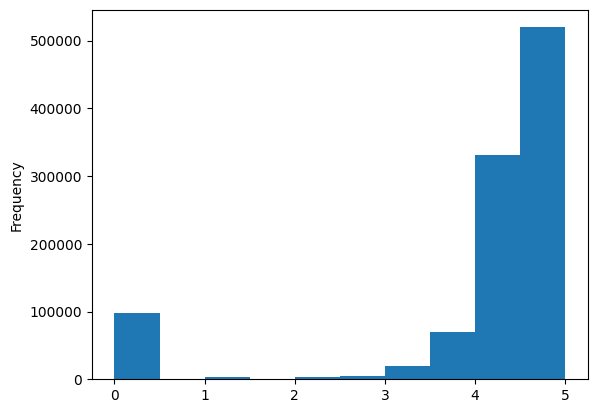

In [ ]:
merged_df['stars'].plot(kind='hist')

Now that we have the best selling categories sorted in a descending order, we can do a **thorough check**. We select products from the best categories with rating above (4.2) and if the boughtLastMonth column is greater than 0. Somewhere between 4.2 and 4.5 is where the upper half of the frequency lies.

Looking at products in the top category: **Sports & Fitness**

In [ ]:
true_best_sellers_df = merged_df[merged_df.category_name=='Sports & Fitness']
true_best_sellers_df= true_best_sellers_df[(true_best_sellers_df.stars > 4.2) & (true_best_sellers_df.boughtInLastMonth>0)]
#true_best_sellers_df.to_excel("/content/drive/MyDrive/Final-Project/best_selling_prods.xlsx", index= False)



Besides the fact that this is the best selling category, there are about 5306 products that were bought in the last month.

We now create a function to get the details of the product. Check the top reviews if posted in the current month. If there exists a review in the current month, then we know that these products are still best sellers for the current
month

In [ ]:
from bs4 import BeautifulSoup
import re # to extract the month name from string
from datetime import datetime

In [ ]:
"""
Testing out handling of retries
"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import re
from requests.adapters import Retry
from requests.sessions import Session

# Function to update product performance with retry mechanism and timeout
def update_product_performance(url):
    url = url
    top_review_months = []
    top_review_stars = []

    # Define retry settings
    retries = Retry(total=5, backoff_factor=1, status_forcelist=[500, 502, 503, 504])

    # Set up a session with retries
    with Session() as session:
        adapter = requests.adapters.HTTPAdapter(max_retries=retries)
        session.mount('http://', adapter)
        session.mount('https://', adapter)

        try:
            # Send a request to the URL with a timeout of 10 seconds
            response = session.get(url, timeout=10)

            if response.status_code == 200:
                # Parse the HTML content of the page
                soup = BeautifulSoup(response.text, 'html.parser')

                # Extract product details
                product_title = soup.find('span', {'id': 'productTitle'}).get_text(strip=True)
                product_rating_date = soup.find_all('span', {'class': 'a-size-base a-color-secondary review-date'})

                # print(f"Product Title: {product_title}")
                print(url[-10:])

                # finding the dates for top reviews
                for pr_date in product_rating_date:
                    top_review_months.append(get_month_name(pr_date.get_text(strip=True)))
                # finding product rating stars out of 5
                product_ratings = soup.find_all('span', {'class': 'a-icon-alt'})
                span_tag = soup.find_all('i', class_='review-rating')
                for span_t in span_tag:
                    # print(span_t.find('span', class_='a-icon-alt').get_text(strip=True))
                    rating_text = span_t.find('span', class_='a-icon-alt').get_text(strip=True)

                    rating_match = re.search(r'(\d+\.\d+)', rating_text)  # using re to extract rating value
                    # out of text: 4.0 out of 5 stars for instance

                    if rating_match:
                        rating = rating_match.group(1)
                        top_review_stars.append(float(rating))  # convert rating to float

                output_df = pd.DataFrame({"Month": top_review_months, "Stars": top_review_stars})

                # getting current date using the datetime library
                current_date = datetime.now()
                output_df = output_df[output_df.Month == current_date.strftime("%B")]
                # print(output_df)

                if not output_df.empty:  # checking if there are reviews in the current month
                    if output_df.Stars.mean() > 2.5:
                        return True

                else:
                    return False

            else:
                print(f"Failed to retrieve the page. Status code: {response.status_code}")
                return False
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            return False
        except Exception as e:
            print(f"Unexpected error: {e}")
            return False

# Function to get month name from abbreviation
def get_month_name(review_date)-> str:
  # using regular expressions to find month name
  month_pattern = re.compile(r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\b', re.IGNORECASE)

  # Find the first occurrence of the month in the string
  match = re.search(month_pattern, review_date)

  if match:
      extracted_month = match.group()
      #print(f"Extracted Month: {extracted_month}")
  else:
      extracted_month=""

  return extracted_month

# Example usage
#url = 'https://www.amazon.com/dp/B07C4LL262'
#result = update_product_performance(url)
#print(result)


We perform this scraping of data to update our dataframe in batches. For 5.3k rows, this process took about 15 hours.

In [ ]:
# running function on batch-1
# do not run again as it takes long to finish the process. I have saved the dataframe as a .xlsx file for future use.
update_details_batch1_df= true_best_sellers_df.iloc[:500,].copy()

#test_df['top_product_in_current_month'] = np.vectorize(get_product_details)(test_df['productURL'])
update_details_batch1_df.loc[:, 'top_product_in_current_month'] = np.vectorize(update_product_performance)(update_details_batch1_df['productURL'])
print(update_details_batch1_df.head())
update_details_batch1_df.to_excel('/content/drive/MyDrive/Final-ProjectBatch1_updated_sales.xlsx', index= False)

In [ ]:
# do not run again as it takes long to finish the process. I have saved the dataframe as a .xlsx file for future use.
update_details_batch8_df= true_best_sellers_df.iloc[3200:4000,].copy()

update_details_batch8_df.loc[:, 'top_product_in_current_month'] = np.vectorize(update_product_performance)(update_details_batch8_df['productURL'])
update_details_batch8_df.to_excel('/content/drive/MyDrive/Final-Project/Batch8_updated_sales.xlsx', index= False)
print(update_details_batch8_df.head())

In [ ]:
# do not run again as it takes long to finish the process. I have saved the dataframe as a .xlsx file for future use.
update_details_batch10_df= true_best_sellers_df.iloc[4700:,].copy()

update_details_batch10_df.loc[:, 'top_product_in_current_month'] = np.vectorize(update_product_performance)(update_details_batch10_df['productURL'])
update_details_batch10_df.to_excel('/content/drive/MyDrive/Final-Project/Batch10_updated_sales.xlsx', index= False)
print(update_details_batch10_df.head())

We now need to combine all the batches of dataframes that we created above.

In [ ]:
list_of_output_dfs= []
for i in range(1,11):
  df= pd.read_excel(f"/content/drive/MyDrive/Final-Project/Batch{i}_updated_sales.xlsx")
  list_of_output_dfs.append(df)

prod_details_curr_month_df= pd.concat(list_of_output_dfs)
print(len(prod_details_curr_month_df))
prod_details_curr_month_df.head()

5306


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,top_product_in_current_month
0,B01LXAGV0H,"Bodyprox Ankle Support Brace, Breathable Neopr...",https://m.media-amazon.com/images/I/81mEoQ2pm-...,https://www.amazon.com/dp/B01LXAGV0H,4.3,0,9.99,19.99,198,True,10000,Sports & Fitness,True
1,B08TF1TTB8,Golf 2021 Supersoft Golf Balls (One Dozen),https://m.media-amazon.com/images/I/71I1Y36VSh...,https://www.amazon.com/dp/B08TF1TTB8,4.8,0,24.97,0.00,198,True,10000,Sports & Fitness,True
2,B014D3KZIQ,Hanes Ultimate Women's 6-Pack Comfort Toe Seam...,https://m.media-amazon.com/images/I/711MgPoMoU...,https://www.amazon.com/dp/B014D3KZIQ,4.7,0,11.99,18.00,198,False,10000,Sports & Fitness,True
3,B0BZ7PHY25,8 Pack Refill Cartridge Kit Replacement Only Blue,https://m.media-amazon.com/images/I/71cG5+J+o8...,https://www.amazon.com/dp/B0BZ7PHY25,4.6,0,24.99,0.00,198,False,4000,Sports & Fitness,True
4,B07CZWYY4H,Megababe Thigh Rescue Anti-Chafe Stick | Preve...,https://m.media-amazon.com/images/I/51xfz6A+bF...,https://www.amazon.com/dp/B07CZWYY4H,4.6,0,13.95,0.00,198,False,8000,Sports & Fitness,True


We have applied the above function to the true_best_sellers_df to understand product sales performance in the current month. Now lets take note of the top 10 performing categories.

In [ ]:
top10_categories_df= sorted_for_best_seller_df.sort_values(by=['isBestSeller', 'reviews', 'stars'], ascending=[False, False, False]).head(10).reset_index()
top10_categories= top10_categories_df.category_name.unique()
top10_categories

array(['Sports & Fitness', 'Industrial & Scientific', 'Kitchen & Dining',
       'Sports & Outdoors', 'Toys & Games', "Women's Clothing",
       'Outdoor Recreation', 'Automotive Tools & Equipment',
       "Girls' Clothing", 'Home Storage & Organization'], dtype=object)

In [ ]:
# we filter by top_product_in_current_month= True; to work with the best performing products

prod_details_curr_month_df= prod_details_curr_month_df[prod_details_curr_month_df.top_product_in_current_month==True]
print(f"The length of df is now: {len(prod_details_curr_month_df)}")
prod_details_curr_month_df.head(3)

The length of df is now: 1863


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,top_product_in_current_month
0,B01LXAGV0H,"Bodyprox Ankle Support Brace, Breathable Neopr...",https://m.media-amazon.com/images/I/81mEoQ2pm-...,https://www.amazon.com/dp/B01LXAGV0H,4.3,0,9.99,19.99,198,True,10000,Sports & Fitness,True
1,B08TF1TTB8,Golf 2021 Supersoft Golf Balls (One Dozen),https://m.media-amazon.com/images/I/71I1Y36VSh...,https://www.amazon.com/dp/B08TF1TTB8,4.8,0,24.97,0.00,198,True,10000,Sports & Fitness,True
2,B014D3KZIQ,Hanes Ultimate Women's 6-Pack Comfort Toe Seam...,https://m.media-amazon.com/images/I/711MgPoMoU...,https://www.amazon.com/dp/B014D3KZIQ,4.7,0,11.99,18.00,198,False,10000,Sports & Fitness,True


Now we look at our products dataset to find out products with 0 stars and check if they belong to better performing categories. If yes, then the manufacturer, could makes better sales by changing the seller, use better SEO words, etc..

In [ ]:
# Products with 0.0 stars
products_w_0_stars= merged_df[merged_df.stars == 0.0].copy()

len(products_w_0_stars)

97730

In [ ]:
# creating a new column 'top_10_category_products'
products_w_0_stars.loc[:, 'top_10_category_products']= merged_df.category_name.isin(top10_categories)
products_w_0_stars.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,top_10_category_products
105,B0C7BF9GRR,Multifunctional 26 Inch Checked Luggage Hard S...,https://m.media-amazon.com/images/I/719ERJgP0B...,https://www.amazon.com/dp/B0C7BF9GRR,0.0,0,239.89,0.00,104,False,0,Suitcases,False
124,B0C6J52B9G,"20 Inch suitcase, Travel Case, User-Friendly F...",https://m.media-amazon.com/images/I/715Y8cXeVF...,https://www.amazon.com/dp/B0C6J52B9G,0.0,0,159.00,189.00,104,False,0,Suitcases,False
127,B0CFYX6FVC,"Spinners, Plum, 29-inch Baseline Large Expandable",https://m.media-amazon.com/images/I/51h8K4SDP8...,https://www.amazon.com/dp/B0CFYX6FVC,0.0,0,869.00,0.00,104,False,0,Suitcases,False
137,B0BN6VDMSD,"Census 32"" Softside Checked 8 Wheel Spinner, G...",https://m.media-amazon.com/images/I/71gJhXJyLp...,https://www.amazon.com/dp/B0BN6VDMSD,0.0,0,134.99,149.99,104,False,0,Suitcases,False
159,B0B3M4Z4GN,"Expectant 32"" Softside Checked 8 Wheel Expanda...",https://m.media-amazon.com/images/I/71ODf9YCYn...,https://www.amazon.com/dp/B0B3M4Z4GN,0.0,0,159.69,179.99,104,False,0,Suitcases,False


In [ ]:
len(products_w_0_stars[products_w_0_stars["top_10_category_products"]==True])

6107

In [ ]:
# this df is the products part of the top 10 categories
products_w_0_stars[products_w_0_stars["top_10_category_products"]==True]["category_name"].unique()

array(["Girls' Clothing", 'Toys & Games', 'Automotive Tools & Equipment',
       'Home Storage & Organization', 'Sports & Fitness',
       'Industrial & Scientific', "Women's Clothing",
       'Outdoor Recreation', 'Sports & Outdoors', 'Kitchen & Dining'],
      dtype=object)

So 6107 out of the 97730 products that have a **0.0 star rating** come under the top 10 performing categories. This analysis could really help the manufacturer or the seller make changes in the sales strategy.

We will use this data in future to improvise sales using SEO.

<Axes: xlabel='0_star_products', ylabel='count'>

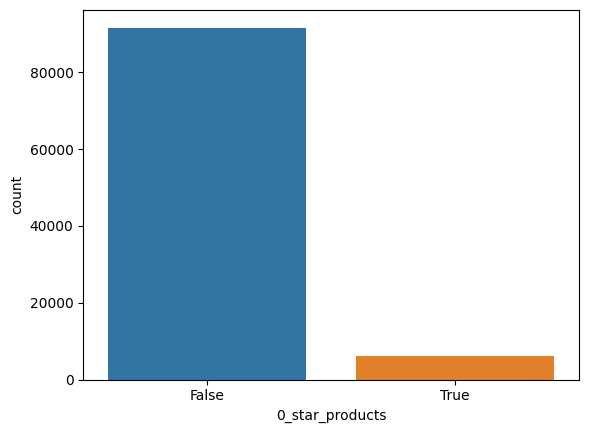

In [ ]:
sns.countplot(x= '0_star_products', data= products_w_0_stars)

We will now look at best performing products in the current month for the best performing category "Sports & Fitness". We will analyse the product name so discover the best strategies for SEO

In [ ]:
from IPython.display import display
# we will use the prod_details_curr_month dataframe. Notice that the number of reviews are 0. To add more sense to this analysis
# we will update the number of reviews in the dataframe by scraping the product uRL
prod_details_curr_month_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,top_product_in_current_month
0,B01LXAGV0H,"Bodyprox Ankle Support Brace, Breathable Neopr...",https://m.media-amazon.com/images/I/81mEoQ2pm-...,https://www.amazon.com/dp/B01LXAGV0H,4.3,0,9.99,19.99,198,True,10000,Sports & Fitness,True
1,B08TF1TTB8,Golf 2021 Supersoft Golf Balls (One Dozen),https://m.media-amazon.com/images/I/71I1Y36VSh...,https://www.amazon.com/dp/B08TF1TTB8,4.8,0,24.97,0.00,198,True,10000,Sports & Fitness,True
2,B014D3KZIQ,Hanes Ultimate Women's 6-Pack Comfort Toe Seam...,https://m.media-amazon.com/images/I/711MgPoMoU...,https://www.amazon.com/dp/B014D3KZIQ,4.7,0,11.99,18.00,198,False,10000,Sports & Fitness,True
3,B0BZ7PHY25,8 Pack Refill Cartridge Kit Replacement Only Blue,https://m.media-amazon.com/images/I/71cG5+J+o8...,https://www.amazon.com/dp/B0BZ7PHY25,4.6,0,24.99,0.00,198,False,4000,Sports & Fitness,True
4,B07CZWYY4H,Megababe Thigh Rescue Anti-Chafe Stick | Preve...,https://m.media-amazon.com/images/I/51xfz6A+bF...,https://www.amazon.com/dp/B07CZWYY4H,4.6,0,13.95,0.00,198,False,8000,Sports & Fitness,True


We have a filtered dataframe of the best products in the current month. To make more sense, lets scrape the latest number of reviews for the products

In [ ]:
from requests.exceptions import ConnectTimeout
def get_num_amazon_reviews(url):
    try:
        # Send a GET request to the Amazon product page
        response = requests.get(url, timeout=5)  # Add a timeout value (in seconds)
        print(url)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page
            soup = BeautifulSoup(response.content, 'html.parser')

            review_link = soup.find('a', {'id': 'acrCustomerReviewLink'})

            # Find the element containing the number of reviews
            reviews_element = soup.find('span', {'class': 'a-link-normal', })

            # Extract the number of reviews
            if review_link:
                ratings_text = review_link.find('span', {'id': 'acrCustomerReviewText'}).get_text(strip=True)
                ratings_numeric = int(''.join(filter(str.isdigit, ratings_text)))
                return ratings_numeric
            else:
                return 0
        else:
            return 0
    except ConnectTimeout:
        print(f"Connection to {url} timed out.")
        return -1


#get_num_amazon_reviews("https://www.amazon.com/dp/B01LXAGV0H")

In [ ]:
# only run once
prod_details_curr_month_df.loc[:, 'latest_review_count'] = np.vectorize(get_num_amazon_reviews)(prod_details_curr_month_df['productURL'])
prod_details_curr_month_df.to_excel("updated_review_count.xlsx", index=False)

https://www.amazon.com/dp/B01LXAGV0H
https://www.amazon.com/dp/B01LXAGV0H
https://www.amazon.com/dp/B08TF1TTB8
https://www.amazon.com/dp/B014D3KZIQ
https://www.amazon.com/dp/B0BZ7PHY25
https://www.amazon.com/dp/B07CZWYY4H
https://www.amazon.com/dp/B07VGT81TX
https://www.amazon.com/dp/B09MG9LJ42
https://www.amazon.com/dp/B0BCKBSB8C
https://www.amazon.com/dp/B093TG8NX4
https://www.amazon.com/dp/B09LVRQ94X
https://www.amazon.com/dp/B08RYFQ6RF
https://www.amazon.com/dp/B07G1XMQVN
https://www.amazon.com/dp/B07QKL1WRL
https://www.amazon.com/dp/B07KBV688F
https://www.amazon.com/dp/B08QDGL56G
https://www.amazon.com/dp/B075YTNRLW
https://www.amazon.com/dp/B07HH5KZFH
https://www.amazon.com/dp/B00004T1JH
https://www.amazon.com/dp/B003U6KN1W
https://www.amazon.com/dp/B09162WXTK
https://www.amazon.com/dp/B07DN2MTKQ
https://www.amazon.com/dp/B00S4GMP8W
https://www.amazon.com/dp/B07RNBJBYG
https://www.amazon.com/dp/B0BCJWKG36
https://www.amazon.com/dp/B0027VGB4Y
https://www.amazon.com/dp/B06XBT1R3S
h

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams

def create_bigrams(text):
    # Tokenize the text into words
    text= text.lower()
    words = nltk.word_tokenize(text)

    unwanted_symbols= [',',';','(',')','[',']','{','}','%','&','*','/',' \\','|','-','_']

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in unwanted_symbols]

    # Generate bi-grams
    bigrams = list(ngrams(filtered_words, 2))

    return bigrams



# Example usage
#input_text = "PATCH Kids Eco-Friendly Bamboo Bandages for Abrasions & Grazes Hypoallergenic Wound Care for Sensitive Skin, Compostable, Biodegradable, Latex Free, Plastic Free, Zero Waste, Coconut Oil, 25ct"
#result_bigrams = create_bigrams(input_text)
#print(result_bigrams)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
prod_details_curr_month_df= pd.read_excel("/content/drive/MyDrive/Final-Project/updated_review_count.xlsx")
prod_details_curr_month_df['bi-grams'] = prod_details_curr_month_df['title'].apply(create_bigrams)

Lets create a word cloud to see the most common words used for the popular products on Amazon

In [ ]:
prod_details_curr_month_df['bi-grams'].to_list()[:3]

[[('bodyprox', 'ankle'),
  ('ankle', 'support'),
  ('support', 'brace'),
  ('brace', 'breathable'),
  ('breathable', 'neoprene'),
  ('neoprene', 'sleeve'),
  ('sleeve', 'adjustable'),
  ('adjustable', 'wrap'),
  ('wrap', '!')],
 [('golf', '2021'),
  ('2021', 'supersoft'),
  ('supersoft', 'golf'),
  ('golf', 'balls'),
  ('balls', 'one'),
  ('one', 'dozen')],
 [('hanes', 'ultimate'),
  ('ultimate', 'women'),
  ('women', "'s"),
  ("'s", '6-pack'),
  ('6-pack', 'comfort'),
  ('comfort', 'toe'),
  ('toe', 'seamed'),
  ('seamed', 'ankle'),
  ('ankle', 'socks')]]

In [ ]:
words_used_in_prod_title=[word for sublist in prod_details_curr_month_df['bi-grams'].to_list() for tup in sublist for word in tup]

We will now create a word cloud to see the most common words in Titles of best performing products

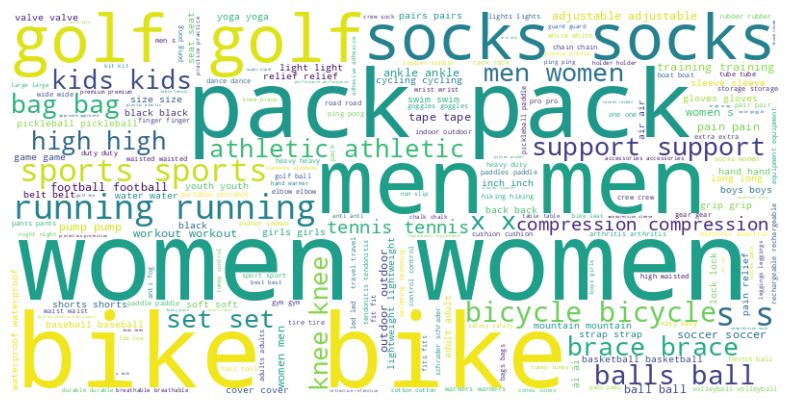

In [ ]:
from wordcloud import WordCloud

# Example data

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words_used_in_prod_title))

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Looking at this Word cloud we understand that make the gender associate to the product name for adults could be one of the reasons of successful sales of the product.

In [ ]:
# lets look at the top 5 words in the wordcloud
from collections import Counter
word_counts = Counter(words_used_in_prod_title)

# Get the top 5 words and their counts
top_words = word_counts.most_common(5)
top_words

[('women', 826), ('bike', 689), ('men', 556), ('pack', 532), ('socks', 468)]

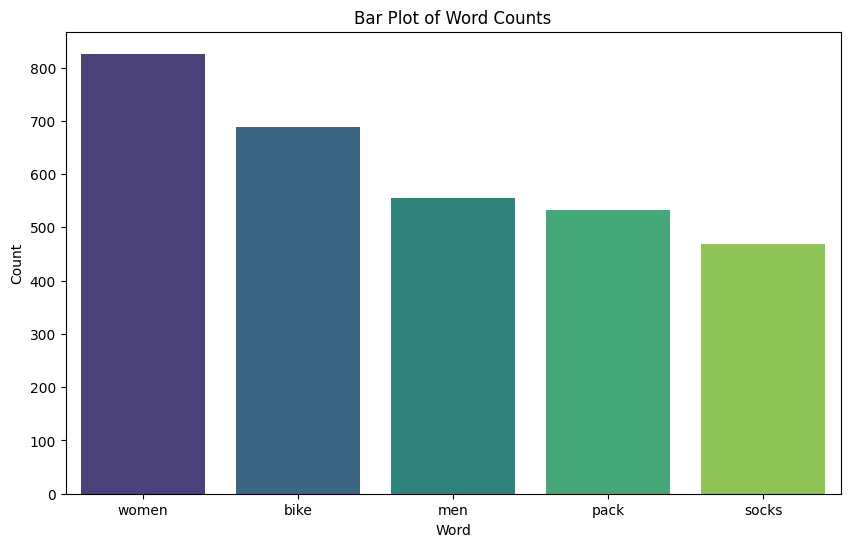

In [ ]:
top_words_df= pd.DataFrame(top_words, columns=['Word', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=top_words_df, palette='viridis')

plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Bar Plot of Word Counts')
plt.show()

In [ ]:
prod_details_curr_month_df[prod_details_curr_month_df.isBestSeller==True].head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,top_product_in_current_month,latest_review_count,bi-grams
0,B01LXAGV0H,"Bodyprox Ankle Support Brace, Breathable Neopr...",https://m.media-amazon.com/images/I/81mEoQ2pm-...,https://www.amazon.com/dp/B01LXAGV0H,4.3,0,9.99,19.99,198,True,10000,Sports & Fitness,True,58981,"[(bodyprox, ankle), (ankle, support), (support..."
1,B08TF1TTB8,Golf 2021 Supersoft Golf Balls (One Dozen),https://m.media-amazon.com/images/I/71I1Y36VSh...,https://www.amazon.com/dp/B08TF1TTB8,4.8,0,24.97,0.00,198,True,10000,Sports & Fitness,True,22315,"[(golf, 2021), (2021, supersoft), (supersoft, ..."
10,B08RYFQ6RF,"Bike Chain Lock, 5 Digit Combination Heavy Dut...",https://m.media-amazon.com/images/I/7119xNNNqW...,https://www.amazon.com/dp/B08RYFQ6RF,4.6,0,18.99,23.99,198,True,5000,Sports & Fitness,True,3073,"[(bike, chain), (chain, lock), (lock, 5), (5, ..."
11,B07G1XMQVN,"CAMBIVO 2 Pack Knee Braces for Knee Pain, Knee...",https://m.media-amazon.com/images/I/815rMekwNg...,https://www.amazon.com/dp/B07G1XMQVN,4.4,0,14.99,29.99,198,True,4000,Sports & Fitness,True,42655,"[(cambivo, 2), (2, pack), (pack, knee), (knee,..."
13,B07KBV688F,Stelle Ballet Shoes for Girls Toddler Ballet S...,https://m.media-amazon.com/images/I/61CGDIk7SE...,https://www.amazon.com/dp/B07KBV688F,4.7,0,10.99,16.99,198,True,6000,Sports & Fitness,True,34836,"[(stelle, ballet), (ballet, shoes), (shoes, gi..."


In [ ]:
true_best_sellers_df= prod_details_curr_month_df[prod_details_curr_month_df.isBestSeller==True]
title_words_true_best_sellers=[word for sublist in true_best_sellers_df['bi-grams'].to_list() for tup in sublist for word in tup]
title_words_true_best_sellers= list(set(title_words_true_best_sellers))
len(title_words_true_best_sellers) # list of good search engine optimized words.


1588

In [ ]:
# here I made an attempt to extract SEO words w.r.t the category_name so the matches are more specific. But however,
# since these categories arent present as a best_seller or had any sales in the current month, it did not make sense moving ahead this way.
test_df= prod_details_curr_month_df[prod_details_curr_month_df.isBestSeller==True]
len(test_df[test_df.category_name=="Toys & Games"])


0

Recall that we created a dataframe of products with 0 stars

In [ ]:
# products_w_0_stars is the dataframe we are going to use

products_in_top10_categories_df= products_w_0_stars[products_w_0_stars["top_10_category_products"]==True]
products_in_top10_categories_df['category_name'].value_counts()

Girls' Clothing                 3828
Toys & Games                    1270
Home Storage & Organization      654
Women's Clothing                 186
Automotive Tools & Equipment     104
Sports & Fitness                  16
Outdoor Recreation                15
Kitchen & Dining                  14
Sports & Outdoors                 12
Industrial & Scientific            8
Name: category_name, dtype: int64

From the above list of value counts we must realise that these are the top categories but arent doing well in sales because they have 0.0 stars in rating. In the sense, the category Girls' Clothing has the most products that are given 0.0 stars in rating, and Industrial & Scientific the least.

Using the list of words in title_words_true_best_sellers, we can find the matches of

In [ ]:
#input_string = "4-Gas Calibration Blend for Industrial Scientific MX6, M40, Ventis MX4 Gas Detection Monitors (58L)"

def display_optimized_seo_words(input_product_title: str):
# List of words to check
  word_list = title_words_true_best_sellers
  matched_seo_words= []
  # Count the occurrences of each word in the string
  word_counts = {word: input_product_title.lower().count(word.lower()) for word in word_list}

  for word, count in word_counts.items():
    if count > 0:
        matched_seo_words.append({word: count})
  return matched_seo_words

display_optimized_seo_words("4-Gas Calibration Blend for Industrial Scientific MX6, M40, Ventis MX4 Gas Detection Monitors (58L)")



[{'6': 1},
 {'bra': 1},
 {'x': 2},
 {'5': 1},
 {'40': 1},
 {'4': 3},
 {'dust': 1},
 {'8': 1}]

In [ ]:
# using the apply function to run matches on the title column to find out what product titles have the most matches
# with the list of words with high SEO
products_in_top10_categories_df['matched_seo_words'] = products_in_top10_categories_df['title'].apply(display_optimized_seo_words)

<ipython-input-58-02ab67b6362b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_in_top10_categories_df['matched_seo_words'] = products_in_top10_categories_df['title'].apply(display_optimized_seo_words)


In [ ]:
products_in_top10_categories_df[products_in_top10_categories_df.category_name== "Industrial & Scientific"][['title','matched_seo_words']]

,title,matched_seo_words
765592,4-Gas Calibration Blend for Industrial Scienti...,"[{'6': 1}, {'bra': 1}, {'x': 2}, {'5': 1}, {'4..."
766257,"SealPlate ColorTab Film, Assorted Colors","[{'tab': 1}, {'color': 2}, {'colors': 1}, {'as..."
766557,"Bathroom Decor Over The Door Hook, Wooden Over...","[{'hooks': 2}, {'rack': 1}, {'room': 3}, {'tow..."
767122,"Syringe Tips, 12.5mL, Sterile","[{'2.5': 1}, {'1': 1}, {'5': 1}, {'.': 1}, {'r..."
767457,"Plastic Hangers 20, 40, 60 Pack ‚Äì Space Savi...","[{'6': 1}, {'‚äì': 2}, {'clothes': 1}, {'dress..."
768429,Nickel Wire 0.5mm x 16.4ft(5M) High Pure Nicke...,"[{'6': 1}, {'pure': 1}, {'pu': 1}, {'1': 1}, {..."
769135,Plastic Frame Solar Eclipse Glasses in Durable...,"[{'6': 1}, {'durable': 1}, {'clip': 1}, {'5': ..."
769600,Fall Kitchen Dish Towels Set of 2 for Fall Dec...,"[{'6': 1}, {'26': 1}, {'bow': 1}, {'1': 2}, {'..."


We will now count the frequency of the matching words in the matched_seo_words

In [ ]:
def get_words_matched(word_freq_dict):

  return sum([list(x.values())[0] for x in word_freq_dict])


In [ ]:
products_in_top10_categories_df.loc['num_matched_words'] = products_in_top10_categories_df['matched_seo_words'].apply(get_words_matched)

<ipython-input-69-e2cafad9b0c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_in_top10_categories_df['num_matched_words'] = products_in_top10_categories_df['matched_seo_words'].apply(get_words_matched)


In [ ]:
products_in_top10_categories_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,top_10_category_products,matched_seo_words,num_matched_words
99422,B0CG553CH7,Girls' Fashion 2 Piece Outfits Fall Long Sleev...,https://m.media-amazon.com/images/I/61pF962ujK...,https://www.amazon.com/dp/B0CG553CH7,0.0,0,29.99,0.0,91,False,0,Girls' Clothing,True,"[{'fits': 1}, {'fit': 1}, {'twist': 1}, {'girl...",20
99519,B0CG551BJP,Girls' Fashion 2 Piece Outfits Fall Long Sleev...,https://m.media-amazon.com/images/I/51a6-A0Y8b...,https://www.amazon.com/dp/B0CG551BJP,0.0,0,29.99,0.0,91,False,0,Girls' Clothing,True,"[{'fits': 1}, {'fit': 1}, {'twist': 1}, {'girl...",20
99624,B0CG569WQG,Girls' Fashion 2 Piece Outfits Fall Long Sleev...,https://m.media-amazon.com/images/I/61sdmjq6hj...,https://www.amazon.com/dp/B0CG569WQG,0.0,0,29.99,0.0,91,False,0,Girls' Clothing,True,"[{'fits': 1}, {'fit': 1}, {'twist': 1}, {'girl...",20
99651,B0CJLFQRNH,Girls' Pink Peach Princess Clothing Children's...,https://m.media-amazon.com/images/I/51iNMYxtCw...,https://www.amazon.com/dp/B0CJLFQRNH,0.0,0,15.88,0.0,91,False,0,Girls' Clothing,True,"[{''s': 1}, {'girls': 1}, {'sports': 1}, {'pin...",13
99776,B0CG54LLK1,Girls' Fashion 2 Piece Outfits Fall Long Sleev...,https://m.media-amazon.com/images/I/61R05Phriz...,https://www.amazon.com/dp/B0CG54LLK1,0.0,0,29.99,0.0,91,False,0,Girls' Clothing,True,"[{'fits': 1}, {'fit': 1}, {'twist': 1}, {'girl...",20


In [ ]:
# checking the range of the count of matching words
products_in_top10_categories_df['num_matched_words'].min(), products_in_top10_categories_df['num_matched_words'].max()

(0, 61)

In [ ]:
# creating bins to turn these numbers to categorical values
bins = [0, 20, 40, 61]
labels = ['Low', 'Medium', 'High']
# on a new column we categorize the associations of product titles to the SEO words
products_in_top10_categories_df['SEO_Association'] = pd.cut(products_in_top10_categories_df['num_matched_words'], bins=bins, labels=labels, right=False)

<ipython-input-84-14c8af683c1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_in_top10_categories_df['SEO_Association'] = pd.cut(products_in_top10_categories_df['num_matched_words'], bins=bins, labels=labels, right=False)


In [ ]:
products_in_top10_categories_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,top_10_category_products,matched_seo_words,num_matched_words,SEO_Association
99422,B0CG553CH7,Girls' Fashion 2 Piece Outfits Fall Long Sleev...,https://m.media-amazon.com/images/I/61pF962ujK...,https://www.amazon.com/dp/B0CG553CH7,0.0,0,29.99,0.0,91,False,0,Girls' Clothing,True,"[{'fits': 1}, {'fit': 1}, {'twist': 1}, {'girl...",20,Medium
99519,B0CG551BJP,Girls' Fashion 2 Piece Outfits Fall Long Sleev...,https://m.media-amazon.com/images/I/51a6-A0Y8b...,https://www.amazon.com/dp/B0CG551BJP,0.0,0,29.99,0.0,91,False,0,Girls' Clothing,True,"[{'fits': 1}, {'fit': 1}, {'twist': 1}, {'girl...",20,Medium
99624,B0CG569WQG,Girls' Fashion 2 Piece Outfits Fall Long Sleev...,https://m.media-amazon.com/images/I/61sdmjq6hj...,https://www.amazon.com/dp/B0CG569WQG,0.0,0,29.99,0.0,91,False,0,Girls' Clothing,True,"[{'fits': 1}, {'fit': 1}, {'twist': 1}, {'girl...",20,Medium
99651,B0CJLFQRNH,Girls' Pink Peach Princess Clothing Children's...,https://m.media-amazon.com/images/I/51iNMYxtCw...,https://www.amazon.com/dp/B0CJLFQRNH,0.0,0,15.88,0.0,91,False,0,Girls' Clothing,True,"[{''s': 1}, {'girls': 1}, {'sports': 1}, {'pin...",13,Low
99776,B0CG54LLK1,Girls' Fashion 2 Piece Outfits Fall Long Sleev...,https://m.media-amazon.com/images/I/61R05Phriz...,https://www.amazon.com/dp/B0CG54LLK1,0.0,0,29.99,0.0,91,False,0,Girls' Clothing,True,"[{'fits': 1}, {'fit': 1}, {'twist': 1}, {'girl...",20,Medium


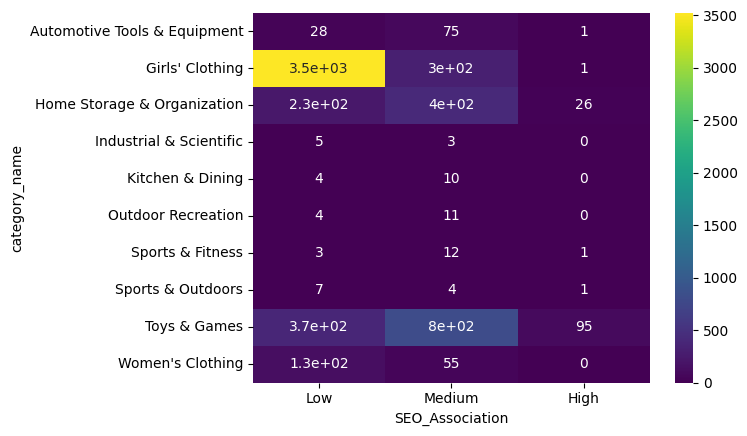

In [ ]:
# this is the heatmap to summarise the categories, their product titles and that their SEO word associations
cross_tab = pd.crosstab(products_in_top10_categories_df['category_name'], products_in_top10_categories_df['SEO_Association'])
sns.heatmap(cross_tab, annot=True, cmap='viridis', cbar=True)
plt.show()

** **End of Notebook** **